In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

np.set_printoptions(threshold=np.inf)

In [149]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [151]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Print the null values % of each column

In [152]:
for col in data.columns:
    print(col, ": ", data[col].isna().sum()/len(data[col]))

Id :  0.0
MSSubClass :  0.0
MSZoning :  0.0
LotFrontage :  0.1773972602739726
LotArea :  0.0
Street :  0.0
Alley :  0.9376712328767123
LotShape :  0.0
LandContour :  0.0
Utilities :  0.0
LotConfig :  0.0
LandSlope :  0.0
Neighborhood :  0.0
Condition1 :  0.0
Condition2 :  0.0
BldgType :  0.0
HouseStyle :  0.0
OverallQual :  0.0
OverallCond :  0.0
YearBuilt :  0.0
YearRemodAdd :  0.0
RoofStyle :  0.0
RoofMatl :  0.0
Exterior1st :  0.0
Exterior2nd :  0.0
MasVnrType :  0.005479452054794521
MasVnrArea :  0.005479452054794521
ExterQual :  0.0
ExterCond :  0.0
Foundation :  0.0
BsmtQual :  0.025342465753424658
BsmtCond :  0.025342465753424658
BsmtExposure :  0.026027397260273973
BsmtFinType1 :  0.025342465753424658
BsmtFinSF1 :  0.0
BsmtFinType2 :  0.026027397260273973
BsmtFinSF2 :  0.0
BsmtUnfSF :  0.0
TotalBsmtSF :  0.0
Heating :  0.0
HeatingQC :  0.0
CentralAir :  0.0
Electrical :  0.0006849315068493151
1stFlrSF :  0.0
2ndFlrSF :  0.0
LowQualFinSF :  0.0
GrLivArea :  0.0
BsmtFullBath :  0

## Find the columns with more than 90% null values

In [153]:
null_columns = [col for col in data.columns if data[col].isna().sum()/len(data[col]) > 0.90]
print(null_columns)

['Alley', 'PoolQC', 'MiscFeature']


## Drop null columns from data frame

In [154]:
data = data.drop(null_columns, axis=1)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


## Drop `ID` column

In [155]:
data = data.drop(["Id"], axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [156]:
columns = data.columns
columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

# Replace all numeric missing values with average value 

In [157]:
numeric_columns = data.select_dtypes(include='number').columns

In [158]:
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Convert categorical variable to numeric variables 

In [159]:
categorical_columns = data.select_dtypes(include='object').columns
categorical_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [160]:
for col in categorical_columns:
    label = LabelEncoder()
    label.fit(list(data[col].values))
    data[col] = label.transform(list(data[col].values))

## Find highly correlated values to the salesPrice

In [161]:
corr_mat = data.corr()
k = 15
top_corr_cols = corr_mat.nlargest(k, "SalePrice")["SalePrice"].index
top_corr_cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')

# Location is very highly correlated to the house prices so lets add it to the top_corr_cols 

In [162]:
top_corr_cols = top_corr_cols.union(["Neighborhood"])
top_corr_cols

Index(['1stFlrSF', 'BsmtFinSF1', 'Fireplaces', 'FullBath', 'GarageArea',
       'GarageCars', 'GarageYrBlt', 'GrLivArea', 'MasVnrArea', 'Neighborhood',
       'OverallQual', 'SalePrice', 'TotRmsAbvGrd', 'TotalBsmtSF', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

# Outlier removal
## Replace all the outliers (> 1.5*IQR) with the 1.5 IQR value

<AxesSubplot:>

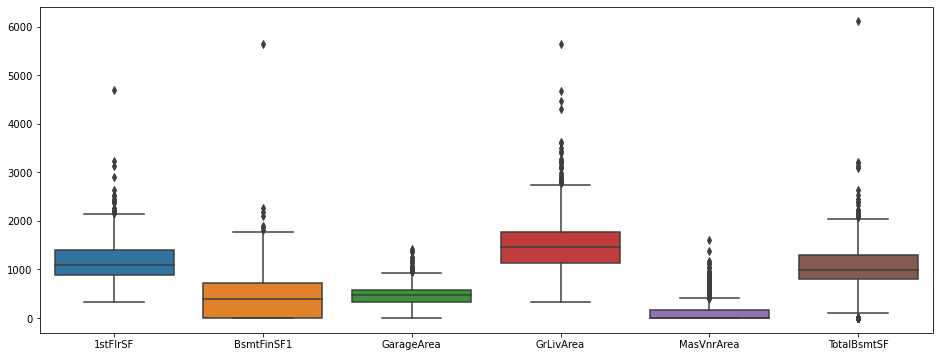

In [163]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data[['1stFlrSF', 'BsmtFinSF1', 'GarageArea', 'GrLivArea', 'MasVnrArea', 'TotalBsmtSF']])

In [164]:
data["1stFlrSF"] = data["MasVnrArea"].apply(lambda x : 2100 if x > 2100 else x)

In [165]:
data["SalePrice"] = data["SalePrice"].apply(lambda x : 350000 if x > 350000 else x)

In [166]:
data["BsmtFinSF1"] = data["BsmtFinSF1"].apply(lambda x : 1900 if x > 1900 else x)

In [167]:
data["GarageArea"] = data["GarageArea"].apply(lambda x : 1000 if x > 1000 else x)

In [168]:
data["GrLivArea"] = data["GrLivArea"].apply(lambda x : 2700 if x > 2700 else x)

In [169]:
data["MasVnrArea"] = data["MasVnrArea"].apply(lambda x : 800 if x > 800 else x)

In [170]:
data["TotalBsmtSF"] = data["MasVnrArea"].apply(lambda x : 2200 if x > 2200 else x)

<AxesSubplot:>

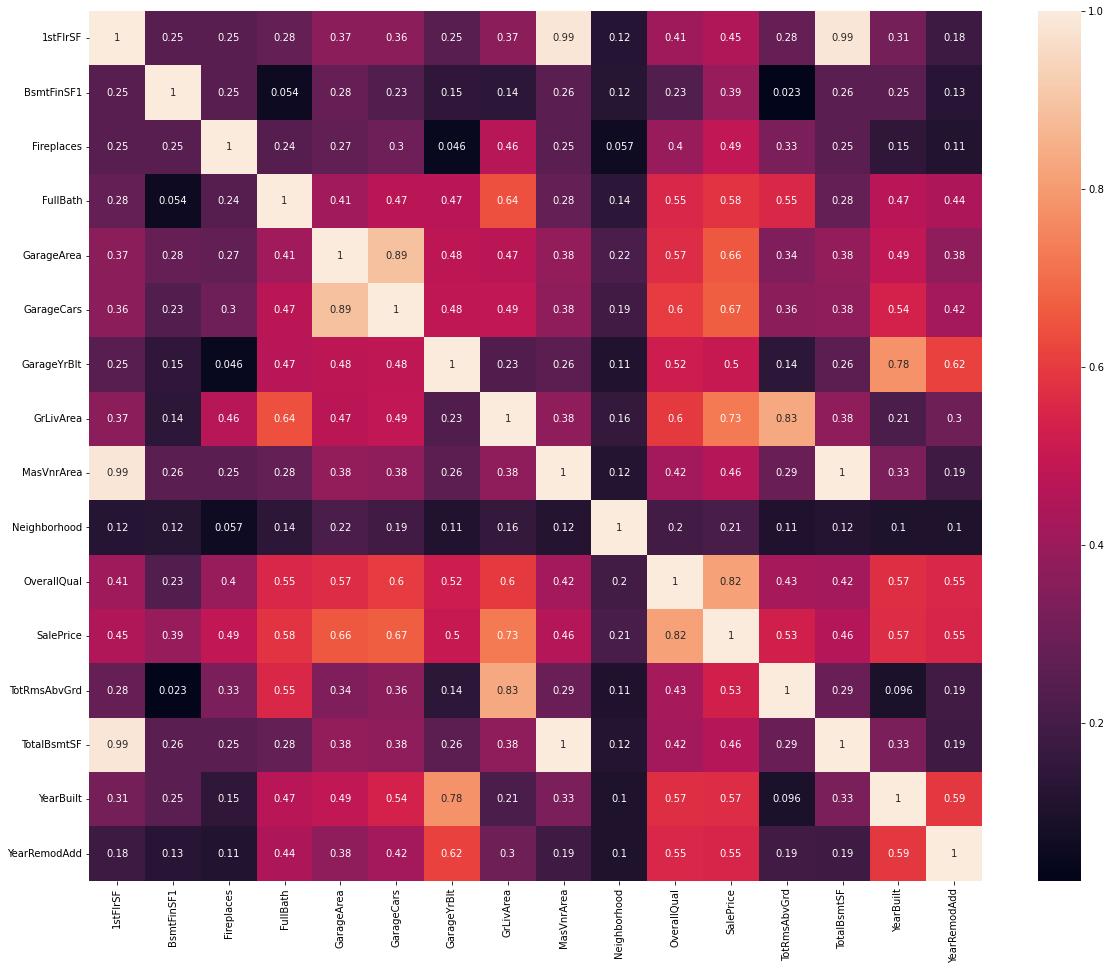

In [171]:
plt.figure(figsize=(20,16))
sns.heatmap(data[top_corr_cols].corr(), annot=True)

## Remove highly correlated variables

In [172]:
top_corr_cols = top_corr_cols.drop(["TotalBsmtSF", "MasVnrArea", "TotRmsAbvGrd", "GarageCars", "GarageYrBlt"])

<AxesSubplot:>

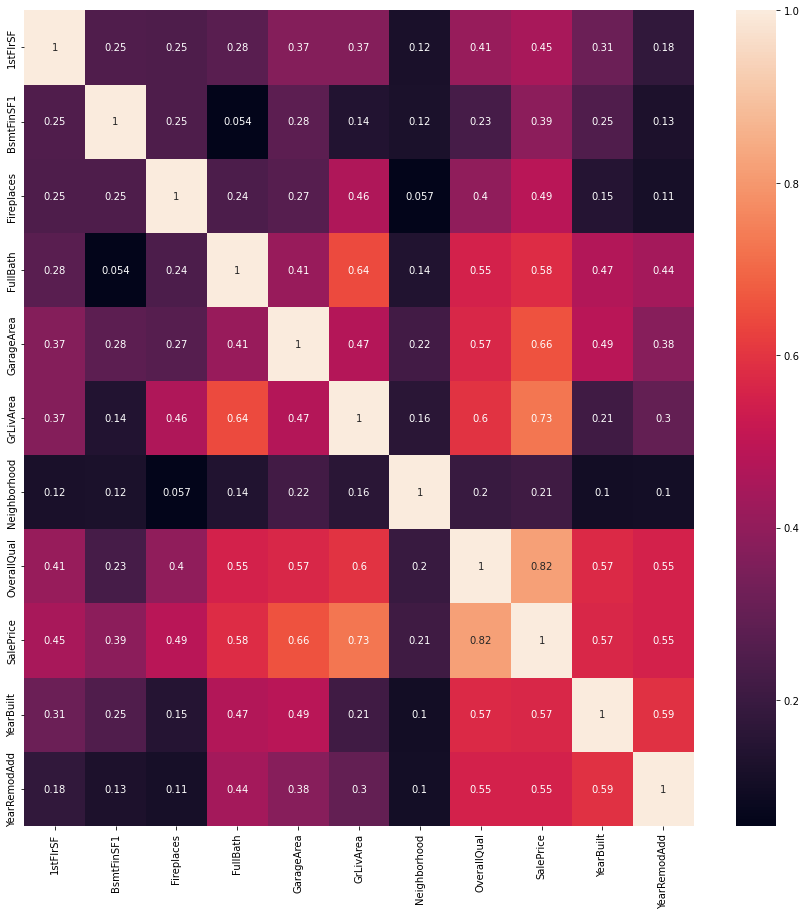

In [173]:
plt.figure(figsize=(15,15))
sns.heatmap(data[top_corr_cols].corr(), annot=True)

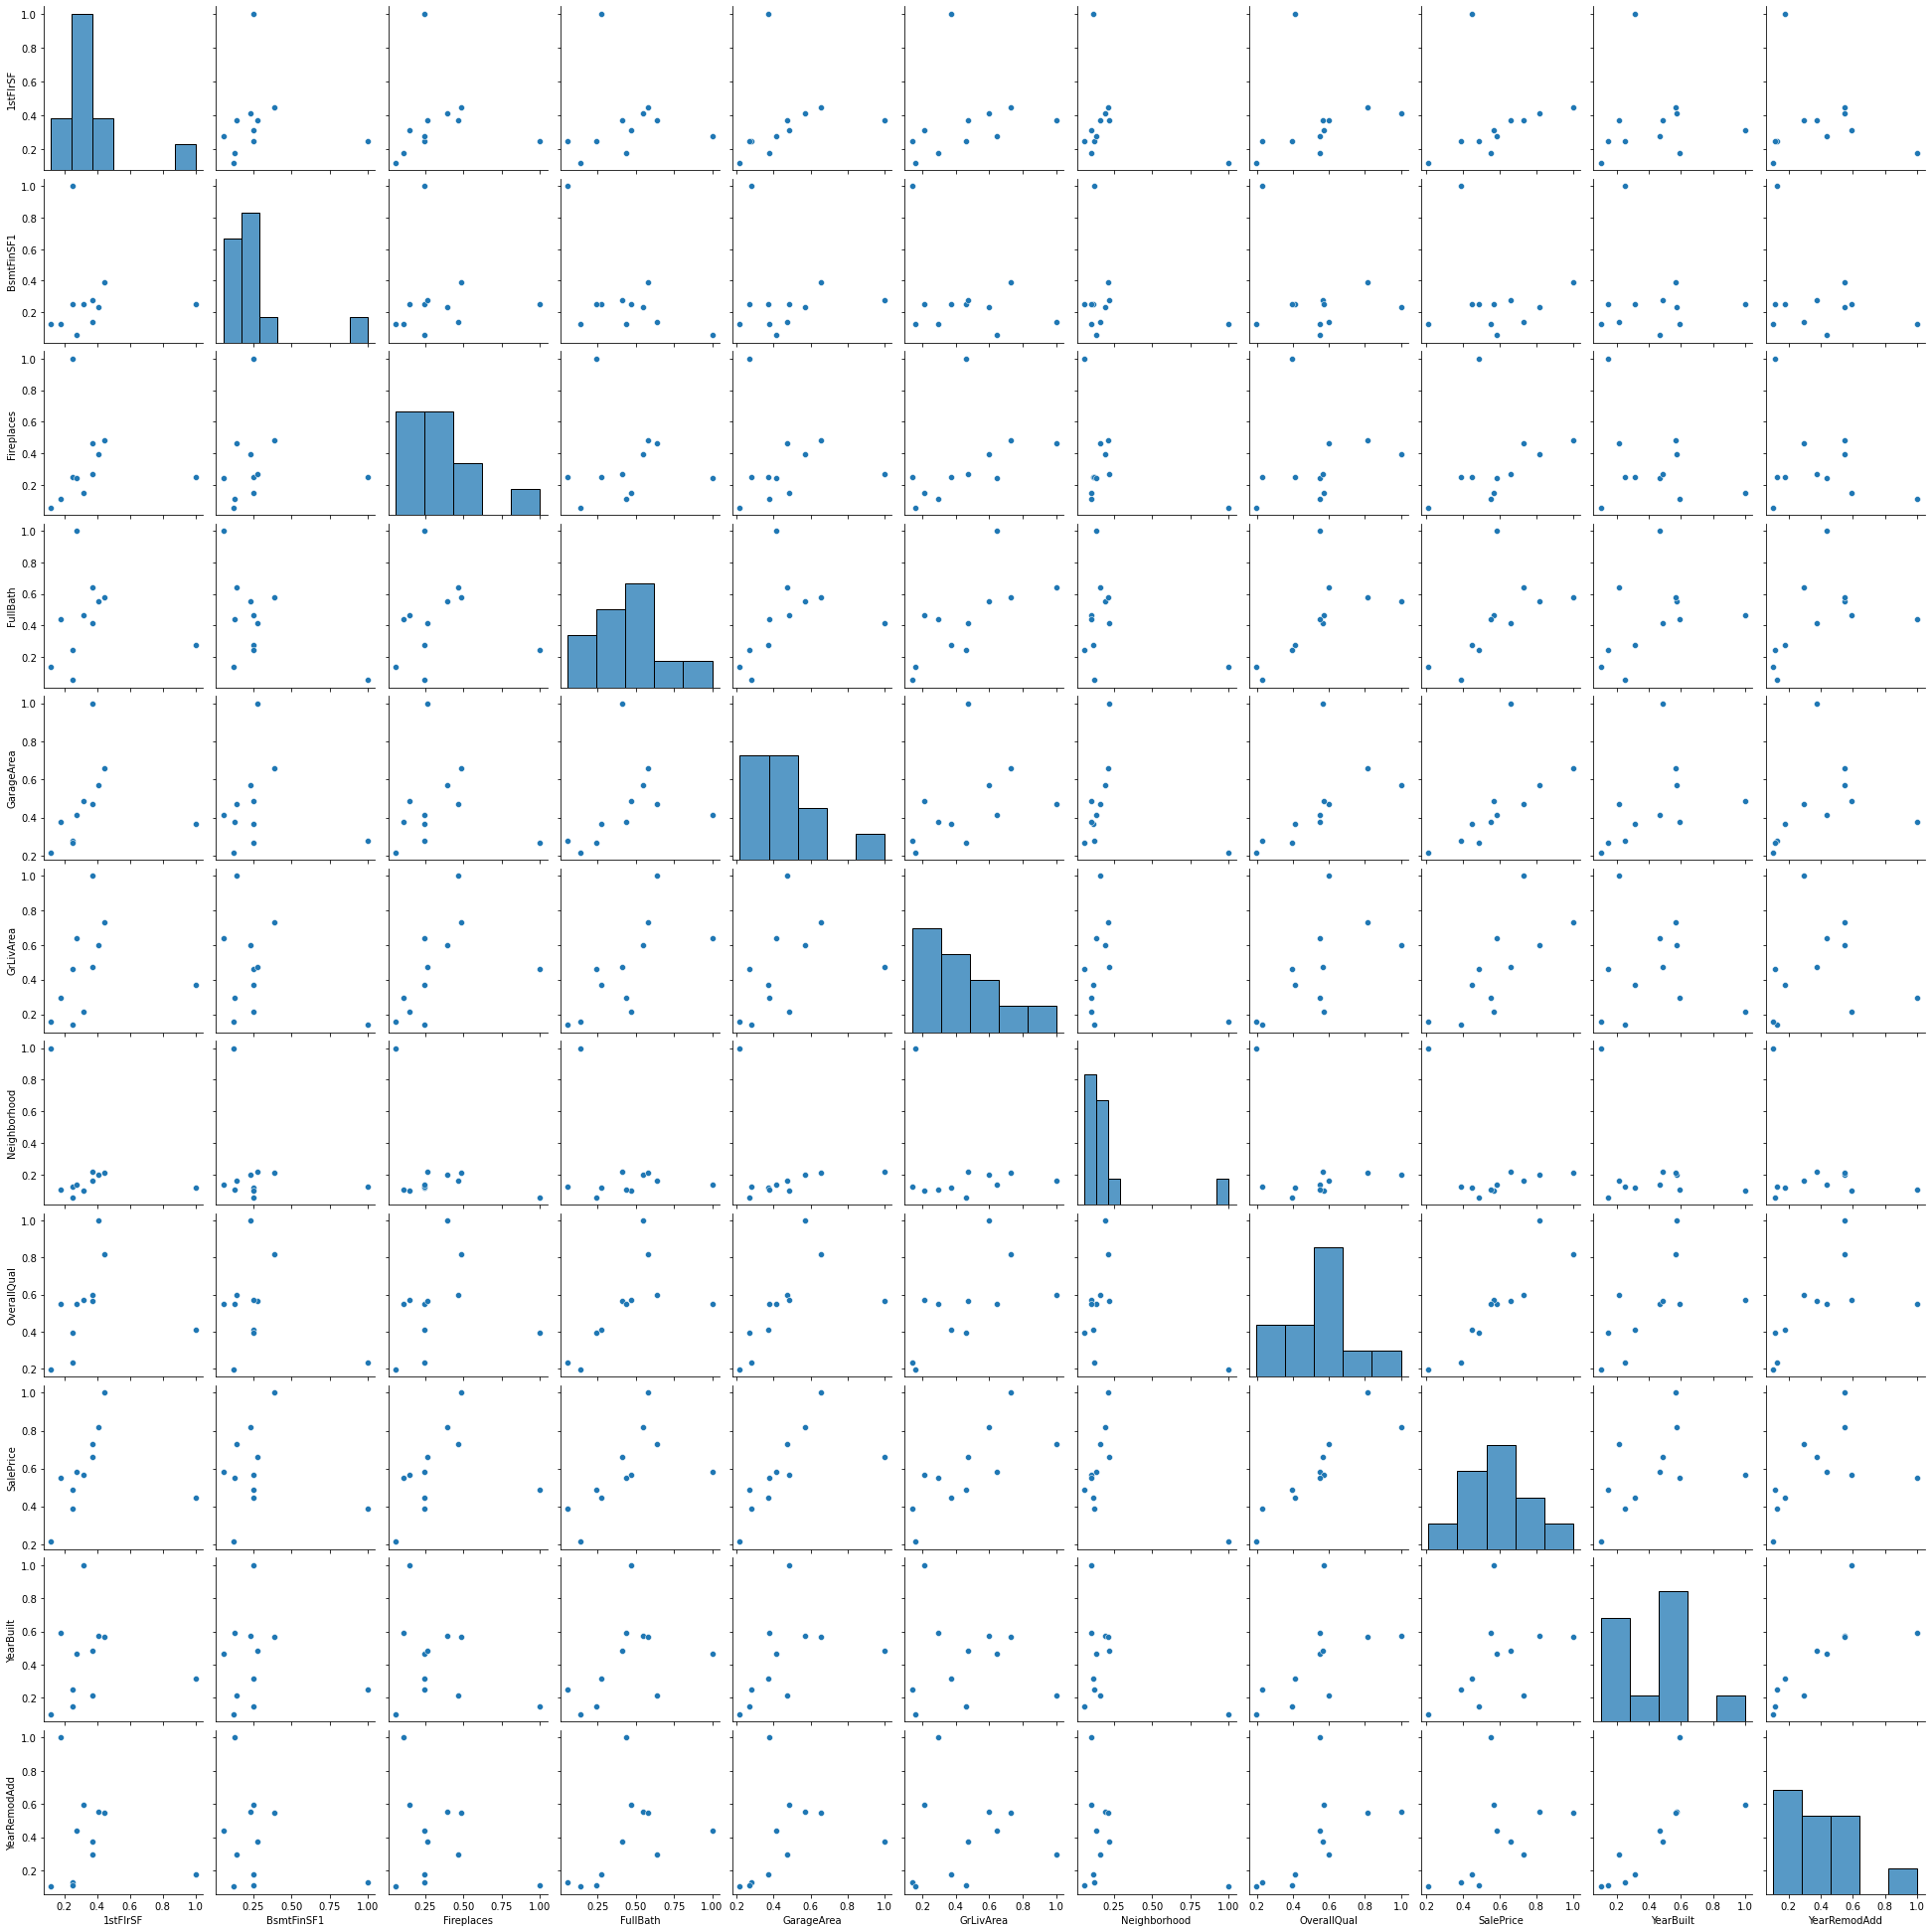

In [174]:
sns.pairplot(data[top_corr_cols].corr())

In [175]:
ridge_data = data[top_corr_cols]

## Split the data in test and train set

In [176]:
ridge_train, ridge_test = train_test_split(ridge_data, test_size=0.25, random_state=100)

## Scale the data using MinMaxScaler

In [177]:
scaler = MinMaxScaler()
ridge_train[top_corr_cols] = scaler.fit_transform(ridge_train[top_corr_cols])

In [178]:
X_train_ridge = ridge_train[top_corr_cols]
y_train_ridge = X_train_ridge.pop("SalePrice")

In [179]:
X_train_ridge

,1stFlrSF,BsmtFinSF1,Fireplaces,FullBath,GarageArea,GrLivArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd
774,0.234375,0.000000,0.333333,0.666667,0.895,0.678603,0.666667,0.777778,0.971014,0.933333
92,0.000000,0.375263,0.000000,0.333333,0.432,0.232538,0.250000,0.444444,0.355072,0.933333
360,0.000000,0.406842,0.333333,0.333333,0.470,0.209549,0.458333,0.555556,0.768116,0.466667
549,0.000000,0.000000,0.333333,0.666667,0.615,0.732095,0.875000,0.666667,0.949275,0.900000
546,0.000000,0.157895,0.333333,0.333333,0.440,0.529178,0.125000,0.555556,0.369565,0.000000
...,...,...,...,...,...,...,...,...,...,...
802,0.000000,0.341053,0.333333,0.666667,0.410,0.450044,0.208333,0.666667,0.963768,0.916667
53,0.000000,0.952632,0.333333,0.000000,0.894,0.620690,1.000000,0.888889,0.789855,0.616667
350,0.226250,0.000000,0.333333,0.666667,0.617,0.632626,0.666667,0.888889,0.978261,0.950000
79,0.000000,0.000000,0.000000,0.333333,0.440,0.350133,0.708333,0.444444,0.275362,0.516667


## Transform the test data

In [180]:
ridge_test[top_corr_cols] = scaler.transform(ridge_test[top_corr_cols])

In [181]:
X_test_ridge = ridge_test[top_corr_cols]
y_test_ridge = X_test_ridge.pop("SalePrice")

## Ridge Regression

In [182]:
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100] 
for i in lambdas: 
    
    ridgereg = Ridge(alpha = i) # Initialize the Ridge Regression model with a specific lambda
    ridgereg.fit(X_train_ridge, y_train_ridge) # fit the model on the polynomial features
    
    #Computing the r2 score
    y_pred_ridge = ridgereg.predict(X_test_ridge)
    print(i,"->", str(r2_score(y_test_ridge, y_pred_ridge)), ridgereg.coef_)
    

0 -> 0.8530021239972612 [ 0.02990247  0.14514647  0.09309135 -0.04773322  0.15209006  0.36971651
  0.01512312  0.43150921  0.13097752  0.07761491]
0.001 -> 0.8530012022878615 [ 0.02991129  0.14514553  0.09309764 -0.04771767  0.15209429  0.36970491
  0.01512443  0.43147919  0.13097552  0.07761877]
0.01 -> 0.8529928899849544 [ 0.02999058  0.14513712  0.09315426 -0.04757786  0.15213226  0.36960062
  0.01513625  0.43120925  0.13095748  0.07765341]
0.1 -> 0.8529081248377459 [ 0.03077187  0.14505294  0.09371472 -0.04619176  0.15250684  0.36856371
  0.01525377  0.42853671  0.13077836  0.07799673]
1 -> 0.8519245503413377 [ 0.03755498  0.14421112  0.09879408 -0.03344606  0.15578983  0.35876422
  0.01637059  0.40423544  0.12910399  0.08114675]
10 -> 0.8386787079664078 [0.06108437 0.13558082 0.12195402 0.03315873 0.16572658 0.29521225
 0.02398963 0.27946724 0.11942483 0.0984296 ]
100 -> 0.7093387456183946 [0.04513102 0.0824219  0.09595593 0.07122744 0.11519033 0.14734564
 0.03280979 0.11656864 0.

### Optimal value of lambda for `Ridge` regression is `0.01`
### Let's double it and see the model performance

In [183]:
ridgereg = Ridge(alpha = 0.02) # Initialize the Ridge Regression model with a specific lambda
ridgereg.fit(X_train_ridge, y_train_ridge) # fit the model on the polynomial features

#Computing the r2 score
y_pred_ridge = ridgereg.predict(X_test_ridge)

print(ridgereg.coef_)
print("R2: ", r2_score(y_test_ridge, y_pred_ridge))
print("RSS: ", np.sum(np.square(y_pred_ridge - y_test_ridge)))
mse =  mean_squared_error(y_test_ridge, y_pred_ridge)
print("MSE: ", mse)
print("RMSE: ", mse**0.5)

[ 0.03007843  0.14512776  0.09321705 -0.04742276  0.15217433  0.36948486
  0.01514936  0.4309099   0.13093747  0.07769184]
R2:  0.852983618518002
RSS:  2.5594616602009044
MSE:  0.00701222372657782
RMSE:  0.08373902152866261


# Lasso Regression

## Test train split

In [184]:
lasso_train, lasso_test = train_test_split(data, test_size=0.3, random_state=100)

## Scale the training data

In [185]:
scale = MinMaxScaler()
lasso_train[columns] = scaler.fit_transform(lasso_train[columns])

In [186]:
y_train_lasso = lasso_train.pop("SalePrice")
X_train_lasso = lasso_train

## Transform the test data

In [187]:
lasso_test[columns] = scaler.transform(lasso_test[columns])

In [188]:
y_test_lasso = lasso_test.pop("SalePrice")
X_test_lasso = lasso_test

## Lasso can perform the feature selection, so lets just pass all the features

In [189]:
lambdas = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
for i in lambdas:
    lasso_reg = Lasso(alpha = i)
    lasso_reg.fit(X_train_lasso, y_train_lasso)
    
    # Compute the r2 score
    y_pred_lasso = lasso_reg.predict(X_test_lasso)
    print(i, "->", r2_score(y_test_lasso, y_pred_lasso))

0 -> 0.8738142716658786
1e-05 -> 0.8741829655191568
0.0001 -> 0.8759597636053781
0.001 -> 0.8742403049479471
0.01 -> 0.7334215420037331
0.1 -> -5.021232521307262e-05
1 -> -5.021232521307262e-05
10 -> -5.021232521307262e-05


/var/folders/wc/s5jc1qxj0ksc58r77p3225n00000gn/T/ipykernel_19575/1404850717.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_reg.fit(X_train_lasso, y_train_lasso)
/Users/i550019/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/i550019/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.322e+00, tolerance: 4.802e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeC

### R Square value for all the lambda values is same, so lets go with `0.01` lambda value
### Let's doulble it and see the model performance

In [190]:
lasso_reg = Lasso(alpha = 0.00002)
lasso_reg.fit(X_train_lasso, y_train_lasso)

# Compute the r2 score
y_pred_lasso = lasso_reg.predict(X_test_lasso)

print(lasso_reg.coef_)
print("R2: ", r2_score(y_test_lasso, y_pred_lasso))
print("RSS: ", np.sum(np.square(y_pred_lasso - y_test_lasso)))
mse =  mean_squared_error(y_test_lasso, y_pred_lasso)
print("MSE: ", mse)
print("RMSE: ", mse**0.5)

[-0.05005805 -0.03764207 -0.04495823  0.17988798  0.0950186  -0.00856059
  0.03055258 -0.0476579   0.00267472  0.06730843  0.01535733 -0.00383521
 -0.14382771 -0.01557267 -0.01344097  0.27103477  0.12692936  0.11345747
  0.0324597   0.00539316  0.00619992 -0.02259142  0.01219929  0.01088931
  0.03617556 -0.03184374  0.00631749  0.03150891 -0.06810237  0.02918824
 -0.02645658 -0.00527667  0.11400932  0.02642593  0.0811907   0.05446604
  0.00110294  0.00956164 -0.01009222 -0.0070536  -0.00361055 -0.02459145
 -0.03457154 -0.03181838  0.46202533  0.06017372 -0.01541804  0.
 -0.01112535 -0.03551741 -0.07886832 -0.05571021 -0.03012137  0.07786079
  0.01003372 -0.0413897  -0.00128019 -0.01408825 -0.00383619  0.04997764
  0.0573425   0.03249061  0.02342884 -0.00282921  0.0312713  -0.02170753
  0.0079592   0.01961948  0.00774049 -0.20210531  0.01188733  0.
  0.00223885 -0.00993278  0.00982808  0.02946448]
R2:  0.8745237950266771
RSS:  2.547631343997973
MSE:  0.005816509917803592
RMSE:  0.076266

## Delete the top 5 predictors and retrain the Lasso model

In [191]:
top_5_predictors = ["GrLivArea", "OverallQual", "BsmtFinSF1", "TotalBsmtSF", "MasVnrArea"]

In [192]:
X_train_lasso = X_train_lasso.drop(top_5_predictors, axis=1)

In [193]:
X_test_lasso = X_test_lasso.drop(top_5_predictors, axis=1)

In [194]:
lasso_reg = Lasso(alpha = 0.00001)
lasso_reg.fit(X_train_lasso, y_train_lasso)

# Compute the r2 score
y_pred_lasso = lasso_reg.predict(X_test_lasso)

#print(list(lasso_reg.coef_))
print("R2: ", r2_score(y_test_lasso, y_pred_lasso))
print("RSS: ", np.sum(np.square(y_pred_lasso - y_test_lasso)))
mse =  mean_squared_error(y_test_lasso, y_pred_lasso)
print("MSE: ", mse)
print("RMSE: ", mse**0.5)

R2:  0.8287054124343523
RSS:  3.4779140828512487
MSE:  0.007940443111532532
RMSE:  0.08910916401545091
